In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [2]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "password"
HOST = "localhost"
PORT = 5432
DATABASE = "project02_crowdfunding_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
first_name VARCHAR(50)
last_name VARCHAR(50)
email VARCHAR(50)
last_update TIMESTAMP

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(500)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR(10)
currency VARCHAR(10)
launch_date DATE
end_date DATE
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_update TIMESTAMP

category
--------
category_id VARCHAR(10)
category VARCHAR(20)
last_update TIMESTAMP

subcategory
--------
subcategory_id VARCHAR(10)
subcategory VARCHAR(20)
last_update TIMESTAMP



In [4]:
# ANALYZE

In [5]:
conn = engine.connect()

In [6]:
query = text(f"""SELECT
	c.category_id,
	ca.category,
	count(cf_id) as num_campaigns
FROM
	campaign c
	JOIN category ca on c.category_id = ca.category_id
GROUP BY
	c.category_id,
	ca.category
ORDER BY
	num_campaigns asc;
""")

df = pd.read_sql(query, con=conn)
df.head()

,category_id,category,num_campaigns
0,cat9,journalism,4
1,cat8,photography,42
2,cat1,food,46
3,cat7,games,48
4,cat6,publishing,67


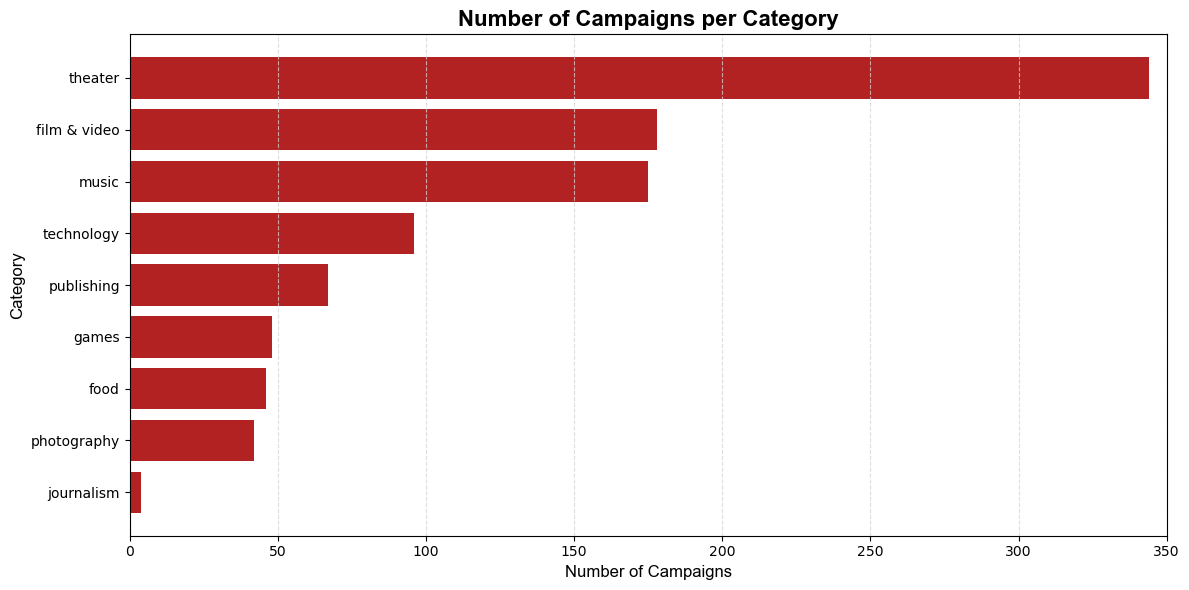

In [7]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(df.category, df.num_campaigns, color="firebrick", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Campaigns", fontfamily="Arial", fontsize=12)
plt.ylabel("Category", fontfamily="Arial", fontsize=12)
plt.title("Number of Campaigns per Category", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_categories.png")
plt.show()

In [8]:
# ORM

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['campaign', 'category', 'contacts', 'subcategory']

In [9]:
 # Assign Classes
Category = Base.classes.category
Contacts = Base.classes.contacts
Campaign = Base.classes.campaign
Subcategory = Base.classes.subcategory

In [10]:
# Create a session
session = Session(engine) # ORM

In [11]:
# Query using the ORM session
from sqlalchemy import asc

rows = (
    session.query(
        Campaign.category_id,
        Category.category,
        func.count(Campaign.cf_id).label("num_campaigns"),
    )
    .join(Category, Campaign.category_id == Category.category_id)
    .group_by(Campaign.category_id, Category.category)
    .order_by(asc("num_campaigns"))
    .all()
)

dfa = pd.DataFrame(rows)
dfa.head()

,category_id,category,num_campaigns
0,cat9,journalism,4
1,cat8,photography,42
2,cat1,food,46
3,cat7,games,48
4,cat6,publishing,67


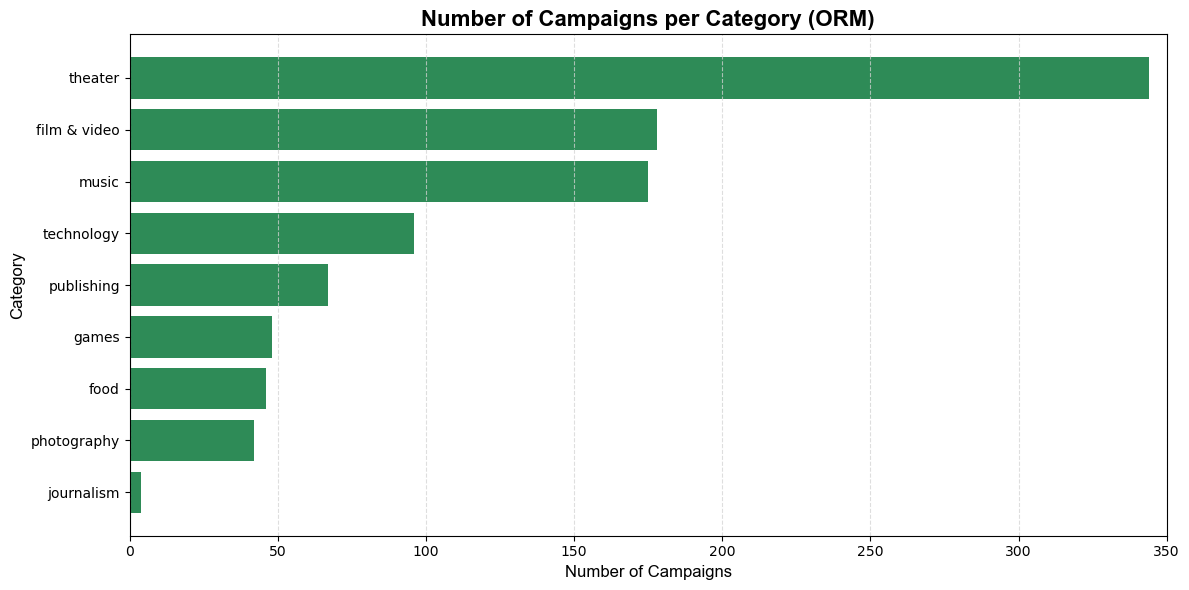

In [12]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(dfa.category, dfa.num_campaigns, color="seagreen", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Number of Campaigns", fontfamily="Arial", fontsize=12)
plt.ylabel("Category", fontfamily="Arial", fontsize=12)
plt.title("Number of Campaigns per Category (ORM)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("part4_categories_ORM.png")
plt.show()

In [13]:
conn.close()
session.close()

In [14]:
engine.dispose()